In [115]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [116]:
#variables
#Purple Colors Used
pcolors = [ '#a05195','#665191','#2f4b7c','#003f5c']
#4 main Colors
mcolors = [ '#1130b9','#ef5675','#7a5195','#ffc600']
#Default figuresize
fsize = (10, 10)

In [117]:
df = pd.read_csv('Data_Pathrise.csv')
df = df[df['program_duration_days'] > 14]
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
3,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
6,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
10,12,Withdrawn,Data,AUG19C,158.0,0,Unemployed,Master's Degree,3-5 months,Lack of relevant experience,5+ years,Citizen,5.0,50,Male,Decline to Self Identify
12,14,Withdrawn,PSO,OCT19A,52.0,0,Employed Part-Time,Bachelor's Degree,1-2 months,Lack of relevant experience,Less than one year,Citizen,4.0,40,Male,Non-Hispanic White or Euro-American
21,23,Withdrawn,SWE,AUG19A,93.0,0,Contractor,Bachelor's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,1.0,10,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2535,Placed,SWE,MAR20A,119.0,1,Employed Full-Time,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,Citizen,0.0,10,Male,South Asian or Indian American
2536,2539,Withdrawn,SWE,JUL19B,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American
2537,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2538,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American


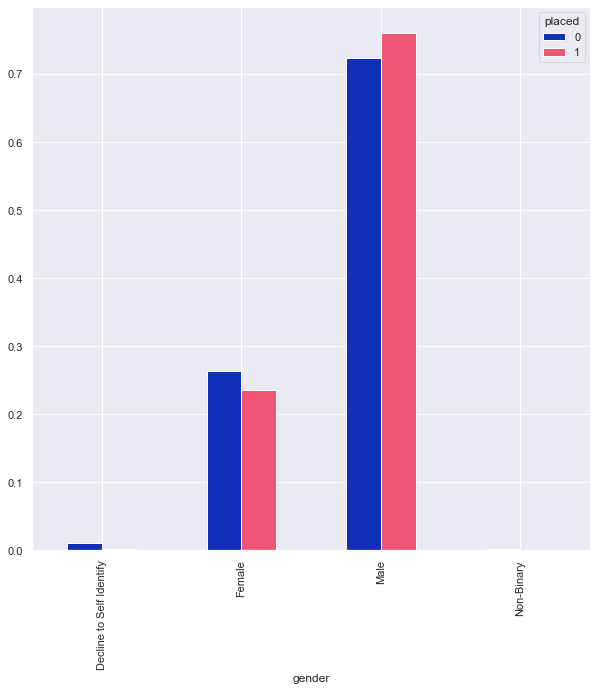

In [118]:
df_grouped = (df.groupby('placed')['gender'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

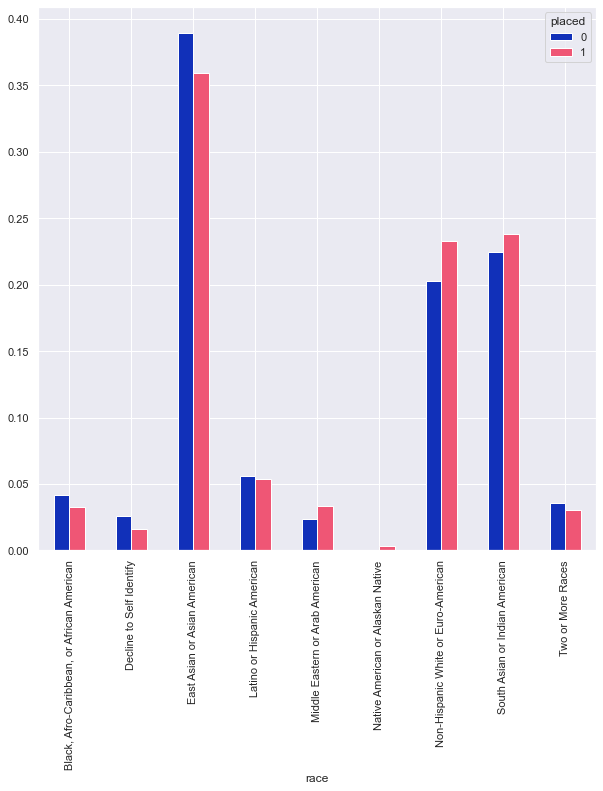

In [119]:
df_grouped = (df.groupby('placed')['race'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

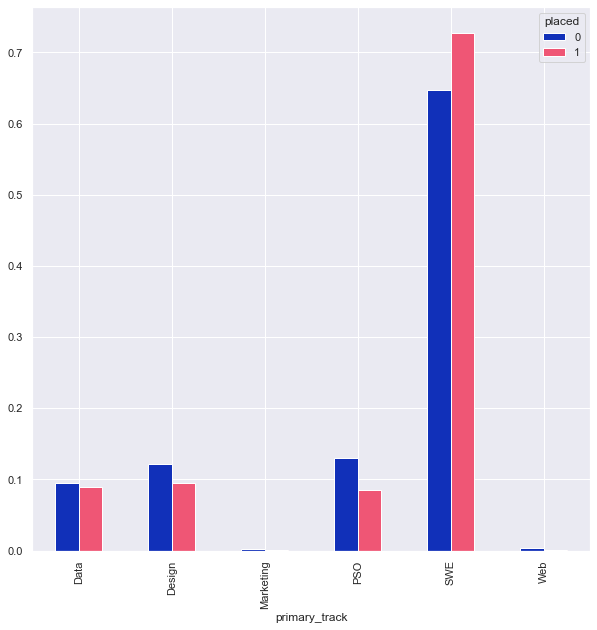

In [120]:
df_grouped = (df.groupby('placed')['primary_track'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

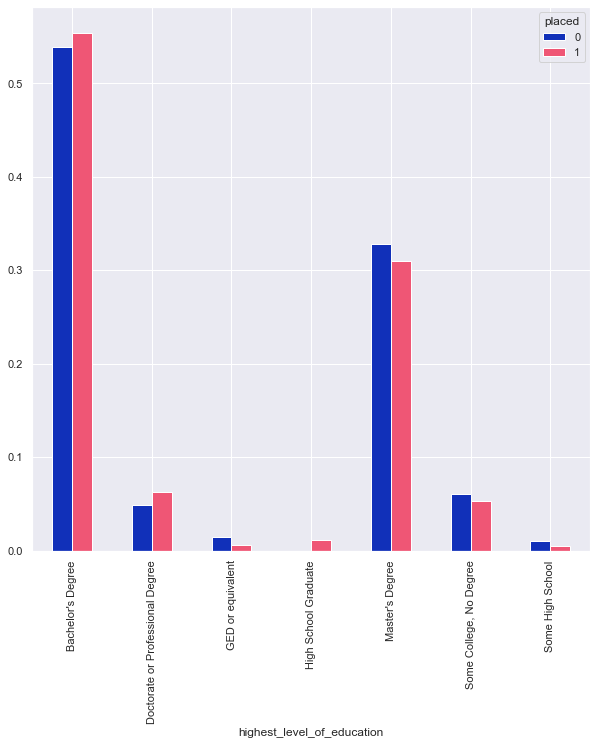

In [121]:
df_grouped = (df.groupby('placed')['highest_level_of_education'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

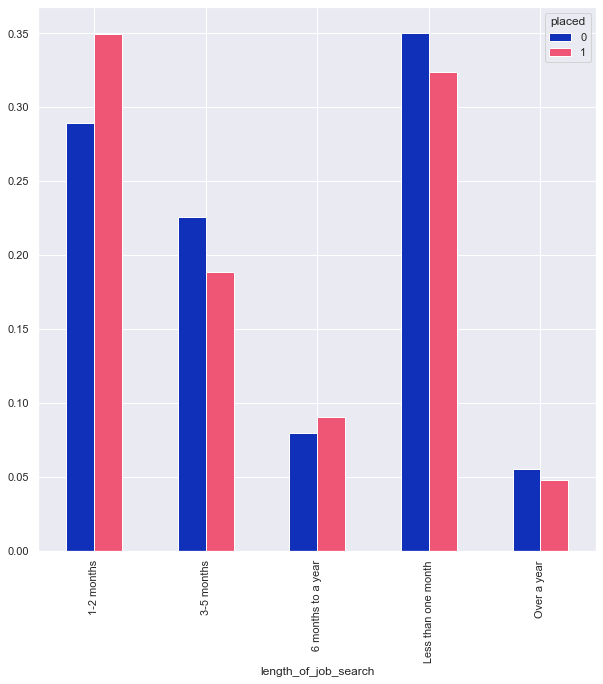

In [122]:
#df = df[df['program_duration_days']>14]
df_grouped = (df.groupby('placed')['length_of_job_search'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

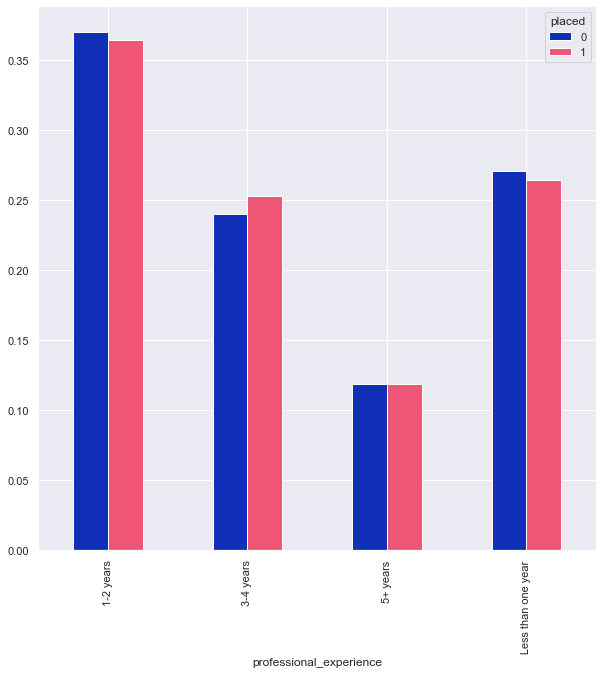

In [123]:
df_grouped = (df.groupby('placed')['professional_experience'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

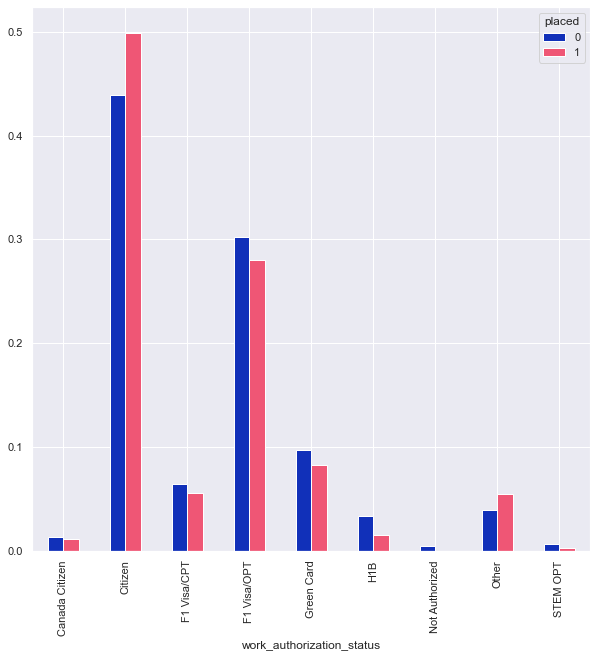

In [124]:
df_grouped = (df.groupby('placed')['work_authorization_status'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

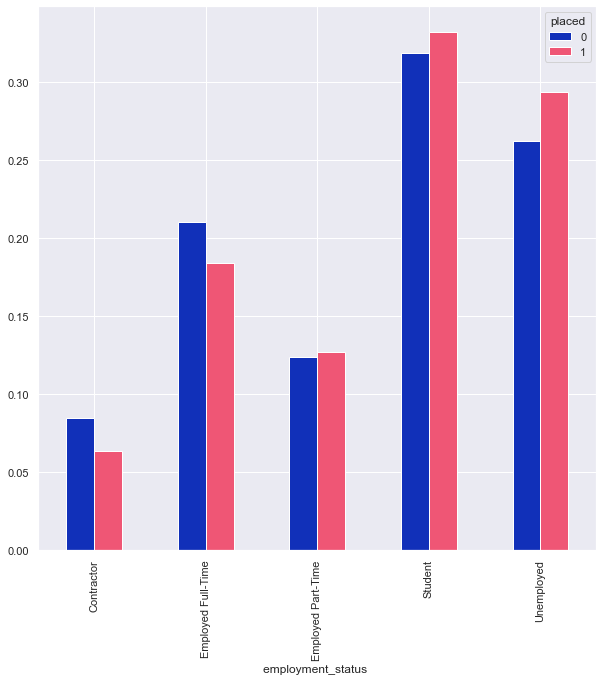

In [125]:
df_grouped = (df.groupby('placed')['employment_status '].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors))

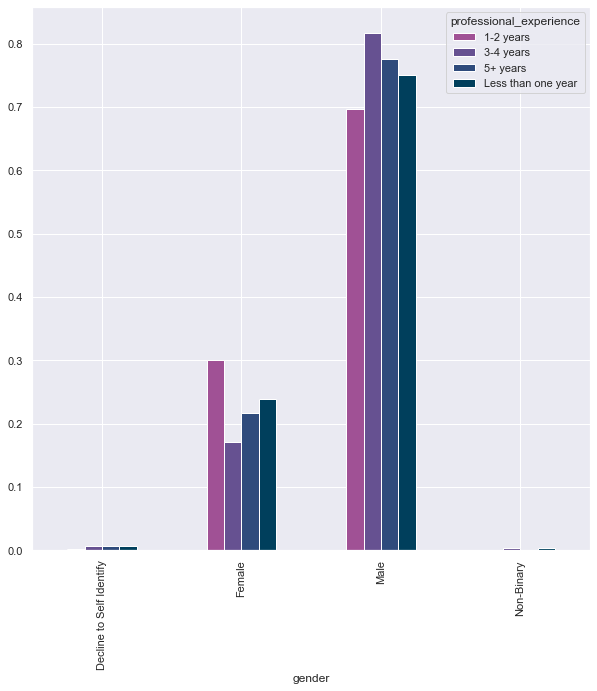

In [126]:
df_grouped = (df.groupby('professional_experience')['gender'].value_counts(normalize=True).unstack('professional_experience').plot.bar(stacked=False, color=pcolors))

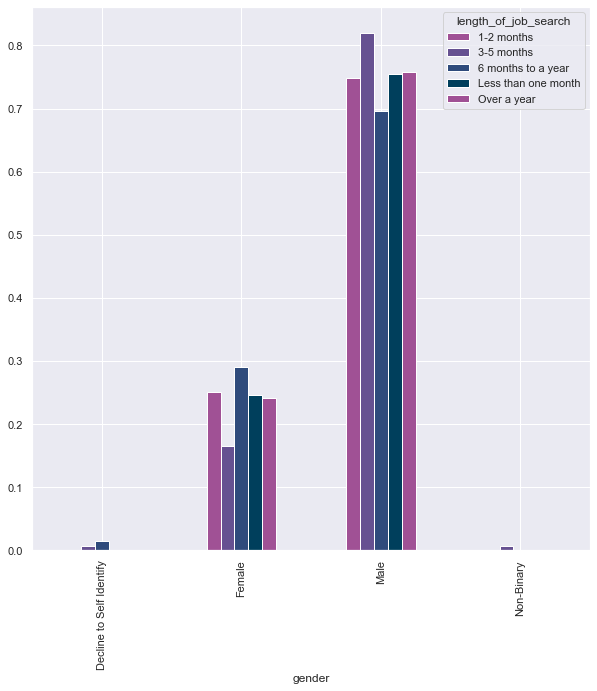

In [127]:
df_idk = df[df['placed']==1]
df_grouped = (df_idk.groupby('length_of_job_search')['gender'].value_counts(normalize=True).unstack('length_of_job_search').plot.bar(stacked=False,color=pcolors))

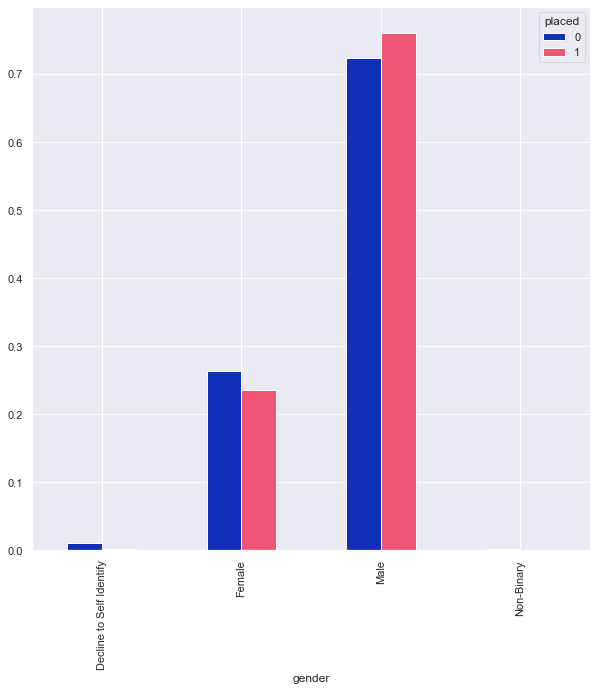

In [128]:

df_grouped = (df.groupby('placed')['gender'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False,color=mcolors,))

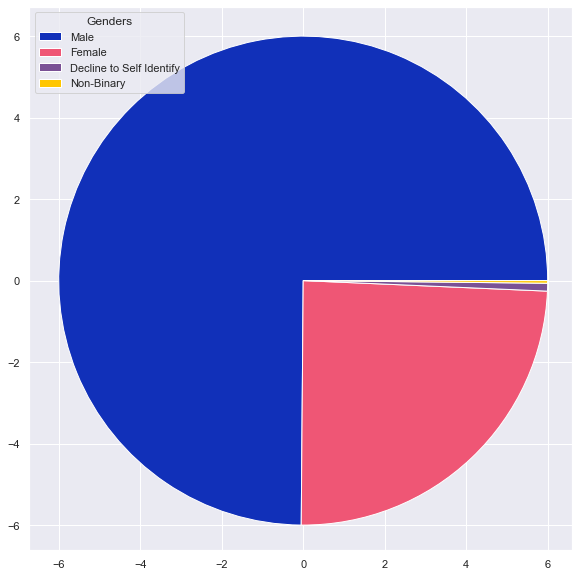

In [129]:
#,explode=(0.1,0.1,1,1) , autopct='%1.1f%%'
df_grouped = df.groupby(['gender']).sum()
gender_count = df['gender'].value_counts()
plt.figure(figsize=fsize)
plt.pie(gender_count, labels = gender_count.index, radius=6, labeldistance=None, frame = True,colors=mcolors)
plt.legend(title="Genders", loc = "upper left")

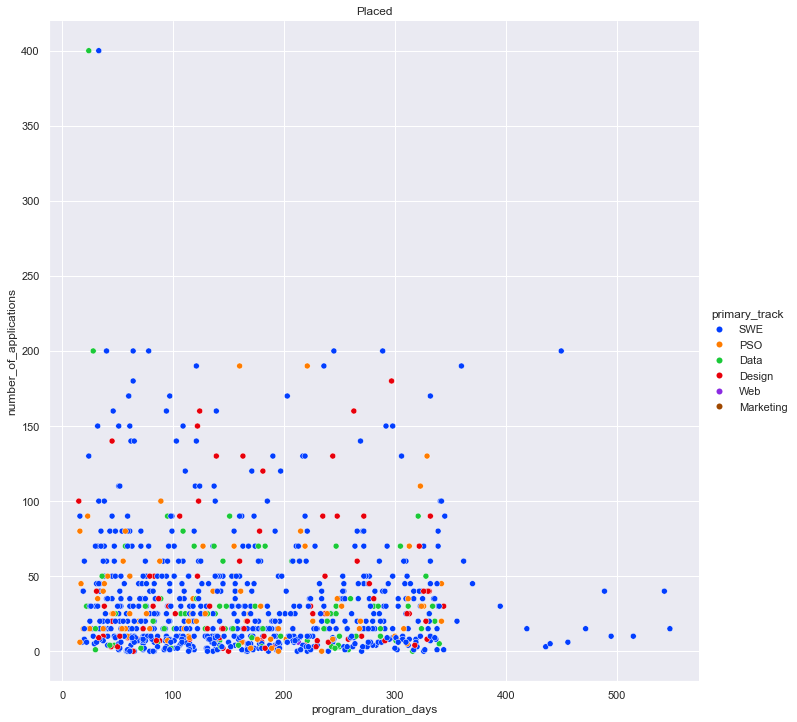

In [130]:
placeddf = df[df["placed"] == 1]
sns.relplot(x="program_duration_days", y="number_of_applications", hue="primary_track",
            sizes=(200), alpha=1, palette="bright",
            height=10 , data=placeddf).set(title='Placed')

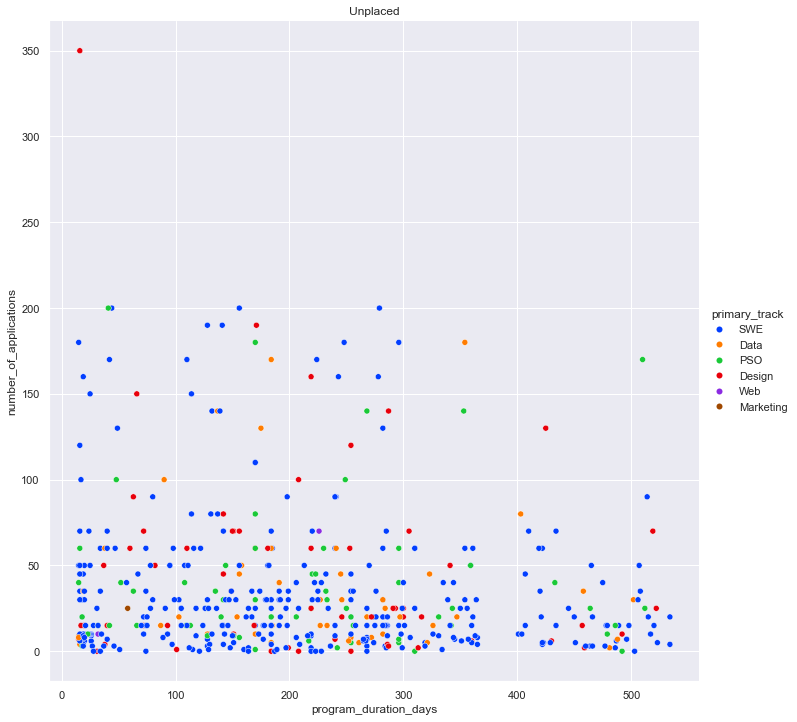

In [131]:
placeddf = df[df["placed"] == 0]
sns.relplot(x="program_duration_days", y="number_of_applications", hue="primary_track",
            sizes=(200), alpha=1, palette="bright",
            height=10 , data=placeddf).set(title='Unplaced')